## A simple demostration of how to run

In [1]:
# before import, make sure FaceBoxes and Sim3DR are built successfully, e.g.,
# sh build.sh

import cv2
import yaml

from FaceBoxes import FaceBoxes
from TDDFA import TDDFA
from utils.functions import draw_landmarks
from utils.render import render
from utils.depth import depth

import matplotlib.pyplot as plt

### Load configs

In [2]:
# load config
cfg = yaml.load(open('configs/mb1_120x120.yml'), Loader=yaml.SafeLoader)

# Init FaceBoxes and TDDFA, recommend using onnx flag
onnx_flag = True  # or True to use ONNX to speed up
if onnx_flag:
    import os
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
    os.environ['OMP_NUM_THREADS'] = '4'
    
    from FaceBoxes.FaceBoxes_ONNX import FaceBoxes_ONNX
    from TDDFA_ONNX import TDDFA_ONNX
    
    face_boxes = FaceBoxes_ONNX()
    tddfa = TDDFA_ONNX(**cfg)
else:
    tddfa = TDDFA(gpu_mode=False, **cfg)
    face_boxes = FaceBoxes()

/Users/ou/miniconda3/envs/d2l/lib/python3.8/site-packages/torch/onnx/utils.py:1191: UserWarning: No names were found for specified dynamic axes of provided input.Automatically generated names will be applied to each dynamic axes of input input
  warnings.warn('No names were found for specified dynamic axes of provided input.'
/Users/ou/miniconda3/envs/d2l/lib/python3.8/site-packages/torch/onnx/utils.py:1191: UserWarning: No names were found for specified dynamic axes of provided input.Automatically generated names will be applied to each dynamic axes of input output
  warnings.warn('No names were found for specified dynamic axes of provided input.'
/Users/ou/miniconda3/envs/d2l/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return t

Convert /Users/ou/Desktop/3DDFA_V2/FaceBoxes/weights/FaceBoxesProd.pth to /Users/ou/Desktop/3DDFA_V2/FaceBoxes/weights/FaceBoxesProd.onnx done.


/Users/ou/miniconda3/envs/d2l/lib/python3.8/site-packages/torch/onnx/utils.py:1191: UserWarning: No names were found for specified dynamic axes of provided input.Automatically generated names will be applied to each dynamic axes of input alpha_shp
  warnings.warn('No names were found for specified dynamic axes of provided input.'
/Users/ou/miniconda3/envs/d2l/lib/python3.8/site-packages/torch/onnx/utils.py:1191: UserWarning: No names were found for specified dynamic axes of provided input.Automatically generated names will be applied to each dynamic axes of input alpha_exp
  warnings.warn('No names were found for specified dynamic axes of provided input.'


Convert configs/bfm_noneck_v3.pkl to configs/bfm_noneck_v3.onnx done.
weights/mb1_120x120.onnx does not exist, try to convert the `.pth` version to `.onnx` online
Convert weights/mb1_120x120.pth to weights/mb1_120x120.onnx done.


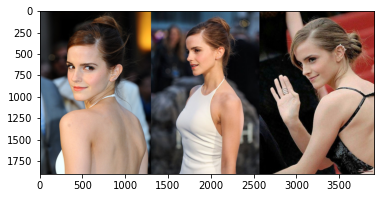

In [3]:
# given an image path
img_fp = 'examples/inputs/emma.jpg'
img = cv2.imread(img_fp)
plt.imshow(img[..., ::-1])

### Detect faces using FaceBoxes

In [4]:
# face detection
boxes = face_boxes(img)
print(f'Detect {len(boxes)} faces')
print(boxes)

Detect 3 faces
[[1699.8129, 278.4989, 2057.769, 762.43463, 0.9999492], [2999.3958, 304.8674, 3428.6719, 900.9678, 0.999895], [317.27075, 399.83636, 792.7346, 1048.3191, 0.99988747]]


### Regressing 3DMM parameters, reconstruction and visualization

In [5]:
# regress 3DMM params
param_lst, roi_box_lst = tddfa(img, boxes)

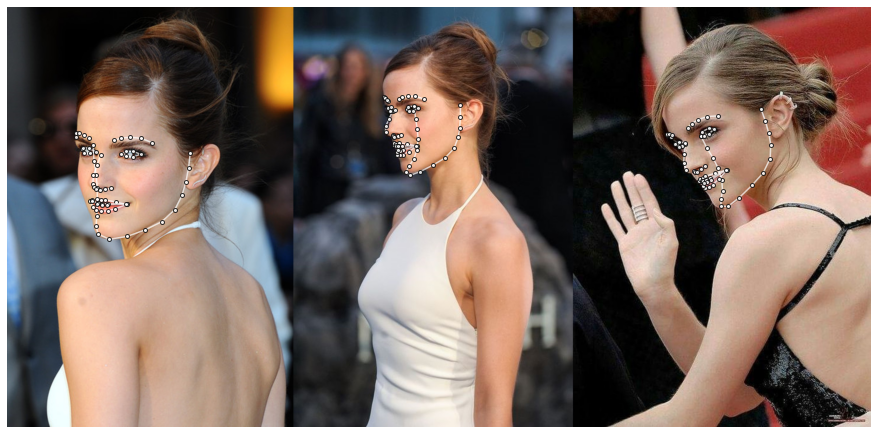

In [6]:
# reconstruct vertices and visualizing sparse landmarks
dense_flag = False
ver_lst = tddfa.recon_vers(param_lst, roi_box_lst, dense_flag=dense_flag)
draw_landmarks(img, ver_lst, dense_flag=dense_flag)

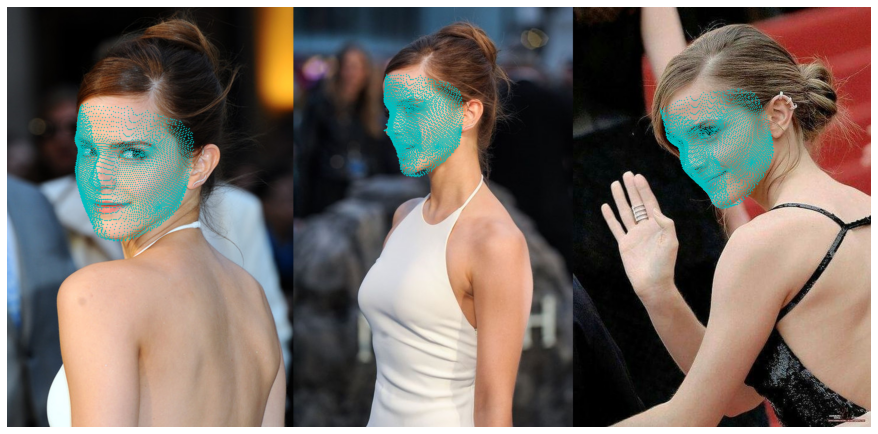

In [7]:
# reconstruct vertices and visualizing dense landmarks
dense_flag = True
ver_lst = tddfa.recon_vers(param_lst, roi_box_lst, dense_flag=dense_flag)
draw_landmarks(img, ver_lst, dense_flag=dense_flag)

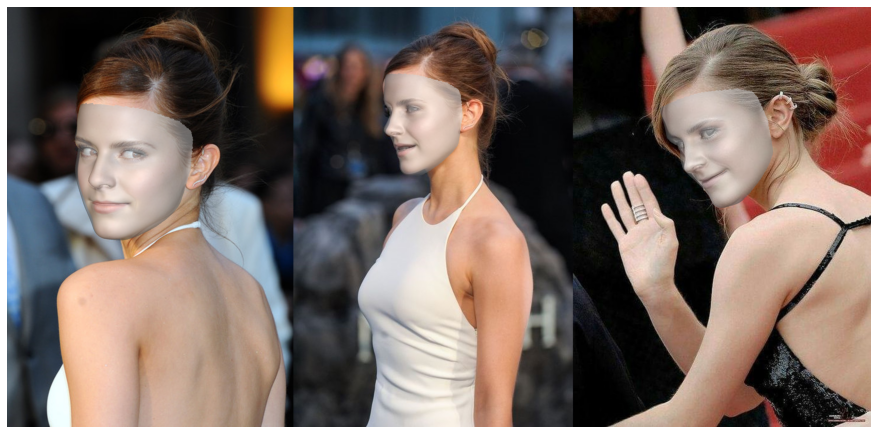

In [8]:
# reconstruct vertices and render
ver_lst = tddfa.recon_vers(param_lst, roi_box_lst, dense_flag=dense_flag)
render(img, ver_lst, tddfa.tri, alpha=0.6, show_flag=True);

In [ ]:
# reconstruct vertices and render depth
ver_lst = tddfa.recon_vers(param_lst, roi_box_lst, dense_flag=dense_flag)
depth(img, ver_lst, tddfa.tri, show_flag=True);